# Client Behavior Analysis

### Define Primary Clients:

- Based on high balance and high number of transactions (logons and calls).



In [8]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# loading the data

data = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_cleaned.csv')

cleaned_df = data.copy()

cleaned_df.sample(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time,log_balance
95290,1339225,15,188,46,M,2,244543.74,6,9,Test,544041108_62227831651,124121437_92956819429_127358,start,2017-06-04 10:15:38,12.407154
246092,6042707,6,81,56,U,3,179087.56,6,9,Test,69165093_66482689471,862358481_40170875231_832419,step_3,2017-04-07 00:49:59,12.095636
64330,2508419,11,142,67,M,2,58992.64,0,3,Control,98270245_94814653097,342377391_84780936558_525432,step_2,2017-06-01 16:37:49,10.985185
260518,5822378,7,84,42,U,3,147113.74,4,7,Control,156922566_16817303086,606723686_64733774301_499141,confirm,2017-06-07 12:58:52,11.898968
237161,839800,5,60,24,U,2,40999.56,0,3,Control,147428734_97414030604,684534779_39892203627_869270,start,2017-03-29 11:30:10,10.621341


In [12]:
# Define primary clients based on high balance (top quartile) and high number of confirmed transactions

balance_threshold = cleaned_df['balance'].quantile(0.75)

# Filter transactions that reached the "confirm" step

confirmed_transactions = cleaned_df[cleaned_df['process_step'] == 'confirm']

# Group by client and count the number of confirmed transactions

confirmed_transaction_counts = confirmed_transactions.groupby('client_id').size()

# Determine the median number of confirmed transactions

median_confirmed_transactions = confirmed_transaction_counts.median()

# Identify primary clients: high balance and high number of confirmed transactions

primary_clients_ids = confirmed_transaction_counts[confirmed_transaction_counts > median_confirmed_transactions].index
primary_clients = cleaned_df[(cleaned_df['balance'] >= balance_threshold) & (cleaned_df['client_id'].isin(primary_clients_ids))]

primary_clients.shape


(11433, 15)

In [14]:
# Calculate demographic traits for primary clients
primary_clients_demographics = {
    'Average Age': primary_clients['clnt_age'].mean(),
    'Gender Distribution': primary_clients['gender'].value_counts(normalize=True),
    'Average Tenure (Years)': primary_clients['clnt_tenure_yr'].mean()
}

# Convert the demographic traits to a more readable format
primary_clients_demographics_df = pd.DataFrame(primary_clients_demographics)

primary_clients_demographics_df

,Average Age,Gender Distribution,Average Tenure (Years)
gender,,,
M,55.162687,0.394210,14.005161
F,55.162687,0.373743,14.005161
U,55.162687,0.232048,14.005161


### Primary clients demographics summary:

- Count: 11,433
- Average Balance: $183,278.51
- Standard Deviation: $57,680.66

*Balance Range:*

- Minimum: $110,859.63
- 25th Percentile: $133,080.76
- Median: $168,566.91
- 75th Percentile: $225,442.25
- Maximum: $316,208.59


**Demographic Traits:**

- Average Age: 55.16 years

*Gender Distribution:*

- Male (M): 39.42%
- Female (F): 37.37%
- Unspecified (U): 23.20%
- Average Tenure (Years): 14.01 years

**Behavior Traits:**

*Number of Accounts:*

- 2 Accounts: 64.59%
- 3 Accounts: 29.48%
- 4 or More Accounts: Small proportion
	
*Balance:*

- Average Balance: $183,278.51

*Balance Range:*

- Minimum: $110,859.63
- 25th Percentile: $133,080.76
- Median: $168,566.91
- 75th Percentile: $225,442.25
- Maximum: $316,208.59

## Visualizations of the comparison between primary clients and all clients

In [15]:
# Calculate overall average age and average tenure for all clients

overall_average_age = cleaned_df['clnt_age'].mean()
overall_average_tenure = cleaned_df['clnt_tenure_yr'].mean()

# Display the overall averages

overall_average_age, overall_average_tenure

(46.71122714461227, 11.352594493025945)

### Age Distribution Comparison (normalized)



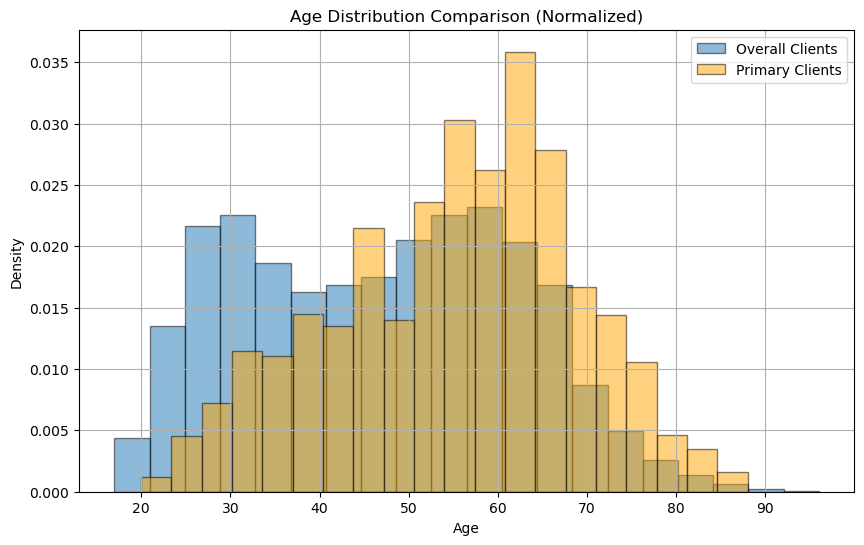

In [19]:
# Overlay normalized histograms for age comparison

plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['clnt_age'], bins=20, edgecolor='k', alpha=0.5, label='Overall Clients', density=True)
plt.hist(primary_clients['clnt_age'], bins=20, edgecolor='k', alpha=0.5, label='Primary Clients', color='orange', density=True)
plt.title('Age Distribution Comparison (Normalized)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Tenure Distribution Comparison (normalized)

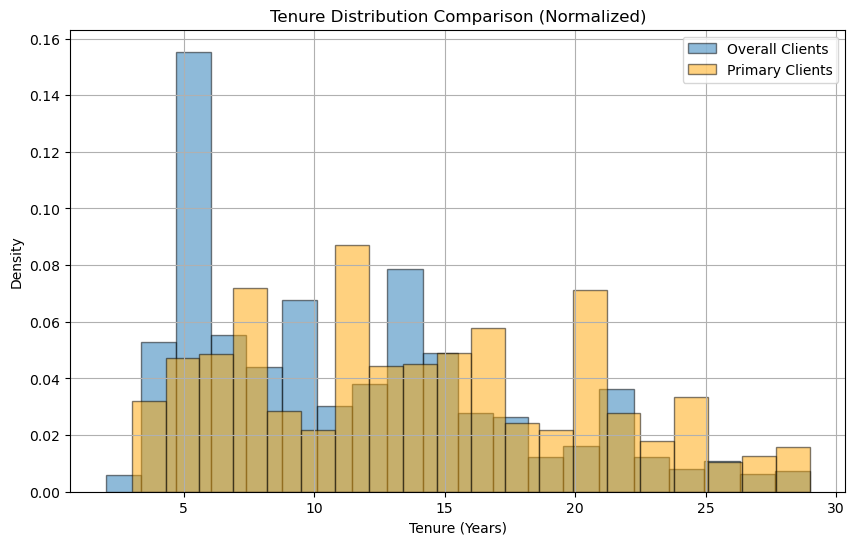

In [20]:
# Overlay normalized histograms for tenure comparison

plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['clnt_tenure_yr'], bins=20, edgecolor='k', alpha=0.5, label='Overall Clients', density=True)
plt.hist(primary_clients['clnt_tenure_yr'], bins=20, edgecolor='k', alpha=0.5, label='Primary Clients', color='orange', density=True)
plt.title('Tenure Distribution Comparison (Normalized)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()